## A Sequential Neural Network binary classifier on the 470-feature data set.

Uses 400-300-200-100-50 dense layers.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Dropout
from keras.metrics import SparseCategoricalAccuracy
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

2024-04-22 14:21:54.470398: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:21:54.473374: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:21:54.509307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 14:21:55.144001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
features = df.iloc[:,0:469]
labels = df['Class']

In [4]:
X=features
y=np.ravel(labels)

In [5]:
y

array([1, 1, 1, ..., 5, 5, 5])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
y_train_5 = y_train!=5
y_test_5 = y_test!=5

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape

(9278, 469)

In [10]:
model = Sequential()
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(rate=.5, seed=42))
model.add(Dense(6, activation='softmax'))

2024-04-22 14:21:56.589748: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-04-22 14:21:56.589789: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: orion
2024-04-22 14:21:56.589794: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: orion
2024-04-22 14:21:56.589906: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.171.4
2024-04-22 14:21:56.589924: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 525.147.5
2024-04-22 14:21:56.589928: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:251] kernel version 525.147.5 does not match DSO version 535.171.4 -- cannot find working devices in this configuration


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train_5,epochs=500)

Epoch 1/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8460 - loss: 0.8599
Epoch 2/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9103 - loss: 0.2852
Epoch 3/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9352 - loss: 0.2213
Epoch 4/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1717
Epoch 5/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9568 - loss: 0.1471
Epoch 6/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1354
Epoch 7/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1219
Epoch 8/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1106
Epoch 9/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.1002
Epoch 10/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0941
Epoch 11/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0920
Epoch 12/500
290/290 ━━━━━━━━━━━━━━━━━━━━

In [12]:
model.evaluate(X_test, y_test_5)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9637 - loss: 0.6886


[1.252002239227295, 0.9603448510169983]

In [13]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
y_test_pred

array([1, 1, 0, ..., 1, 0, 1])

In [15]:
confusion_matrix(y_test_5, y_test_pred)

array([[ 298,   50],
       [  42, 1930]])

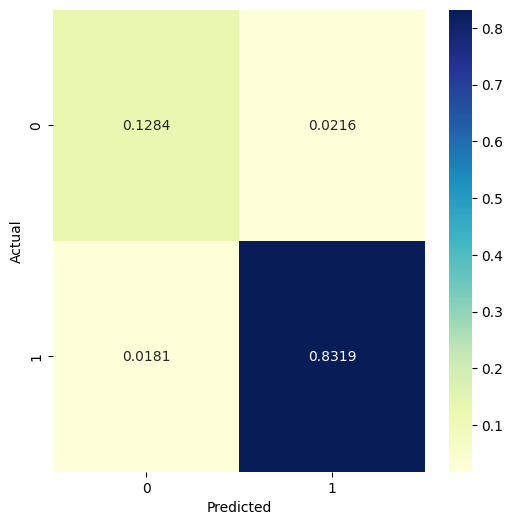

In [16]:
cm = confusion_matrix(y_test_5, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

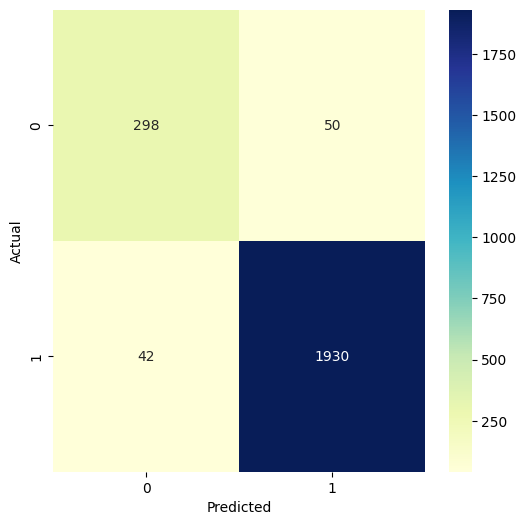

In [17]:
cm = confusion_matrix(y_test_5, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [18]:
precision_score(y_test_5, y_test_pred)

0.9747474747474747

In [19]:
recall_score(y_test_5, y_test_pred)

0.9787018255578094

In [20]:
f1_score(y_test_5, y_test_pred)

0.9767206477732794